In [25]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import signal
from scipy.optimize import curve_fit
from pandas_ods_reader import read_ods


In [48]:
lines = []
with open("PuTTY_out.txt") as f:
    lines = [l for l in f]

# with open("data.txt") as f:
#     lines = [l for l in f]

In [49]:
A1 = lines[2::3]
A0 = lines[0::3]
Ax = lines[1::3]

# A1_ = [i for i in A1]
# A0_ = [int(i[4:]) for i in A0]

# A1_

In [50]:
# A0 = lines[2::14]
# A1 = norm( [int(l[4:7]) for l in lines[3::14]])
# A2 = norm( [int(l[4:7]) for l in lines[4::14]])
# Pm1p0 = norm([float(l[6:]) for l in lines[5::14]])
# Pm2p5 = norm([float(l[6:]) for l in lines[6::14]])
# Pm4p0 = norm([float(l[6:]) for l in lines[7::14]])
# Pm10p0 = norm([float(l[7:]) for l in lines[8::14]])
# AmbientHumidity = norm([float(l[16:]) for l in lines[9::14]])
# AmbientTemperature = norm([float(l[19:]) for l in lines[10::14]])


In [51]:
def read_data(indx):
    temp = lines[indx::3]

    temp_ = []
    for i in temp:
        try:
          temp_.append(int(i[3:]))
        except:
          pass
    temp_ = np.array(temp_)

    return temp_
    

In [52]:
A_ch4 = read_data(2)
A_co = read_data(0)
Ax_ = read_data(1)

In [53]:
len(t)

1498

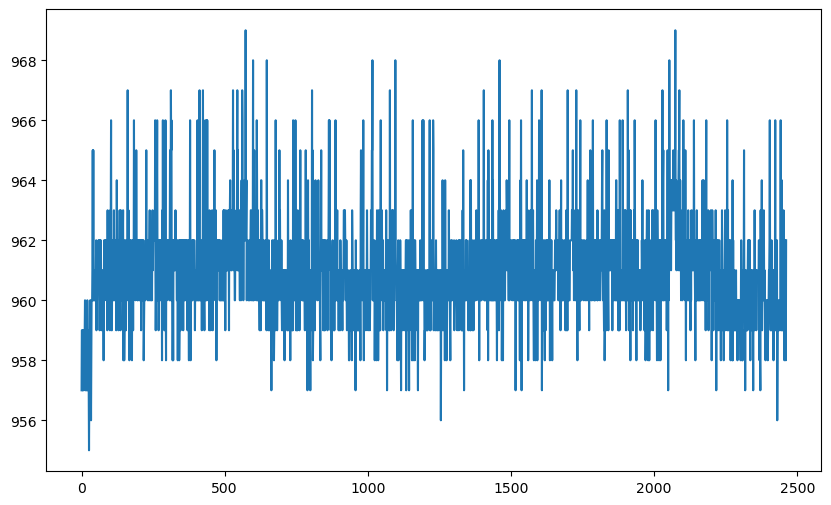

In [72]:
plt.figure(figsize=(10, 6))
t = range(len(Ax_))
plt.plot(t, Ax_)
# plt.savefig("CO.png")

In [55]:
# t = range(len(A1_))
# plt.scatter(t, A1_)
# plt.savefig("NOx.png")

In [65]:
R_L_ch4 = 5.3 #K OMEGA
R_L_co = 2.76 #K OMEGA

Rs_ch4 = (Ax_/A_ch4 - 1) * R_L_ch4
Rs_co = (Ax_/A_co - 1) * R_L_co

T_ch4 = Ax_/A_ch4
T_co = Ax_/A_co

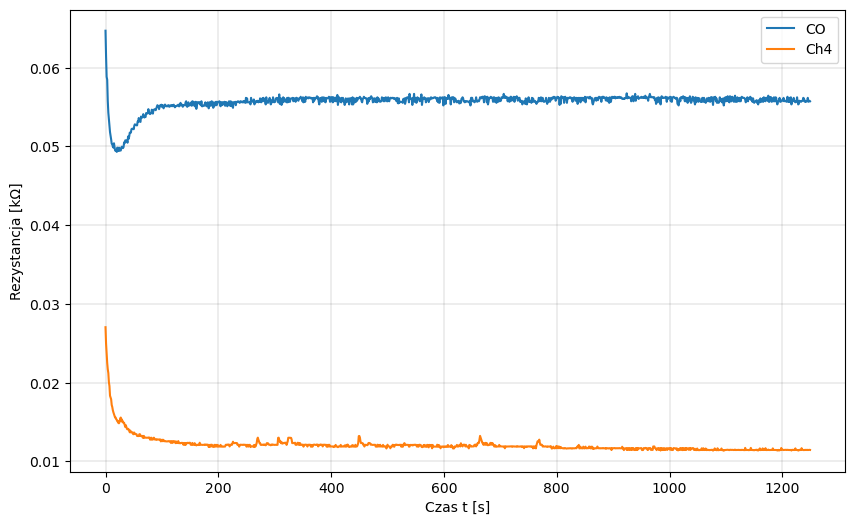

In [70]:

offset = 1250
plt.figure(figsize=(10, 6))
plt.plot(t[:offset], 1/Rs_co[:offset], label="CO")
plt.plot(t[:offset], 1/Rs_ch4[:offset], label="Ch4")
# plt.plot(t, 1/T_ch4, label="CO")
# plt.plot(t, 1/T_co, label="Ch4")


plt.ylabel('Rezystancja [kΩ]')
plt.xlabel('Czas t [s]')
plt.grid(color='k', linestyle='-', linewidth=0.1)
plt.legend()
# plt.savefig('Clear_Air_+_went.png')
plt.show()


In [85]:
# plt.scatter(t, A1, label="A1")
# plt.scatter(t, A2, label="A2")
# plt.scatter(t, Pm1p0, label="Pm1p0")
# plt.scatter(t, Pm2p5, label="Pm2p5")
# plt.scatter(t, Pm4p0, label="Pm4p0")
# plt.scatter(t, Pm10p0, label="Pm10p0")


# plt.ylabel('Energia [keV]')
# plt.xlabel('Numer kanału')
# plt.legend()
# plt.grid(color='k', linestyle='-', linewidth=0.1)
# # plt.savefig('Calibration.png')
# plt.show()